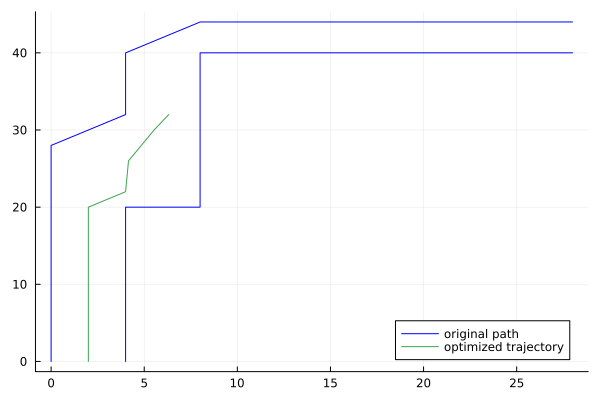

In [71]:
using CSV, JuMP, Ipopt, DelimitedFiles, LinearAlgebra, Plots, StatsPlots

# Read data from CSV files
left_boundary = readdlm("left2.csv", ',', Float64)
right_boundary = readdlm("right2.csv", ',', Float64)

# Extract x and y values
using JuMP, Ipopt, CSV

# Read in data from CSV files


# Define a JuMP model
model = Model(Ipopt.Optimizer)
set_silent(model)
# Define variables
@variable(model, x[1:10])
@variable(model, y[1:10])

for i = :9
    # Ensure the trajectory is smooth
    @NLconstraint(model, (x[i+1]-x[i])*(y[i]-y[i-1]) - (x[i]-x[i-1])*(y[i+1]-y[i]) >= 0)
end
# Define objective function
@NLobjective(model, Min, sum(((left_boundary[i,1] + right_boundary[i,1]) - x[i])^2 + ((left_boundary[i,2] + right_boundary[i,2]) - y[i])^2 for i=1:10))
@NLobjective(model, Min, sum((left_boundary[i,2] - y[i])^2 + (right_boundary[i,2] - y[i])^2 for i=1:10))
# Define constraints



# Set initial guess
for i = 1:10
        set_start_value(x[i], (left_boundary[i,1] + right_boundary[i,1])/2)
        set_start_value(y[i], (left_boundary[i,1] + right_boundary[i, 2])/2)
     
    
end

# Solve the optimization problem
optimize!(model)

# Print the optimal solution

x_opt = value.(x)
y_opt = value.(y)
plot(left_boundary[:,1], left_boundary[:,2], label="original path", c=:blue)
plot!(right_boundary[:,1], right_boundary[:,2], c=:blue, label = nothing)
plot!(x_opt, y_opt, label="optimized trajectory")